In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingRandomSearchCV
import optuna
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats



from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

/root/miniconda3/envs/envPytorch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
def cross_val(model, x_df , y_df):
    pred = cross_val_score(model, x_df, y_df, cv=5, scoring='r2')
    return pred

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [3]:
df = pd.read_csv('listing_filtered.csv')
y = 'number_of_reviews_l30d'

y_df = df[y]
x_df = df.drop(y, axis=1)
# x_df = x_df.drop('number_of_reviews_l30d',axis=1)
# x_df = x_df.drop('reviews_per_month',axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=42)
X_train.shape

(7179, 71)

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# 使用测试数据进行预测
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred) 
evaluate(y_test,test_pred)

Test set evaluation:
_____________________________________
MAE: 0.9346619620186094
MSE: 1.740402631225712
RMSE: 1.319243203971774
R2 Square 0.5288167242737375
Train set evaluation:
_____________________________________
MAE: 0.9253730556412889
MSE: 1.6742658867670286
RMSE: 1.2939342667875477
R2 Square 0.5550043999791052


(0.9346619620186094, 1.740402631225712, 1.319243203971774, 0.5288167242737375)

----
----

In [5]:
X_train = sm.add_constant(X_train)  # Adds a constant term to the predictor

In [6]:
# 添加常数项以拟合截距
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     number_of_reviews_l30d   R-squared:                       0.555
Model:                                OLS   Adj. R-squared:                  0.551
Method:                     Least Squares   F-statistic:                     124.8
Date:                    Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                            08:45:19   Log-Likelihood:                -12036.
No. Observations:                    7179   AIC:                         2.422e+04
Df Residuals:                        7107   BIC:                         2.471e+04
Df Model:                              71                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                          -56.8840     23.759     -2.394      0.017    -103.458     -10.310
host_response_time                               0.1301      0.035      3.759      0.000       0.062       0.198
host_response_rate                              -0.0010      0.002     -0.587      0.557      -0.004       0.002
host_acceptance_rate                             0.0010      0.001      0.914      0.361      -0.001       0.003
host_listings_count                          -5.516e-05      0.001     -0.045      0.964      -0.002       0.002
host_total_listings_count                       -0.0005      0.000     -1.160      0.246      -0.001       0.000
latitude                                        -0.2486      0.171     -1.453      0.146      -0.584       0.087
longitude                                        0.3193      0.149      2.147      0.032       0.028       0.611
accommodates                                    -0.0294      0.017     -1.756      0.079      -0.062       0.003
bathrooms                                       -0.0305      0.032     -0.953      0.340      -0.093       0.032
bedrooms                                         0.0104      0.029      0.357      0.721      -0.047       0.067
beds                                            -0.0257      0.020     -1.279      0.201      -0.065       0.014
price                                        -2.231e-06    7.9e-06     -0.283      0.778   -1.77e-05    1.33e-05
minimum_nights                                  -0.0029      0.001     -2.007      0.045      -0.006   -6.63e-05
maximum_nights                                6.256e-05    4.8e-05      1.303      0.193   -3.16e-05       0.000
minimum_minimum_nights                           0.0008      0.002      0.501      0.616      -0.002       0.004
maximum_minimum_nights                           0.0007      0.001      1.414      0.157      -0.000       0.002
minimum_maximum_nights                       -3.988e-05      0.000     -0.251      0.802      -0.000       0.000
maximum_maximum_nights                          -0.0006      0.000     -2.767      0.006      -0.001      -0.000
minimum_nights_avg_ntm                          -0.0019      0.001     -1.988      0.047      -0.004    -2.6e-05
maximum_nights_avg_ntm                           0.0006      0.000      1.962      0.050    5.12e-07       0.001
availability_30                                  0.0024      0.004      0.604      0.546      -0.005       0.010
availability_60                                  0.0061      0.004      1.532      0.125      -0.002       0.014
availability_90                                 -0.0029      0.002     -1.417      0.156      -0.007 

In [35]:
y_train = y_train + 1
y_train, lambda_ = stats.boxcox(y_train)
# model = sm.OLS(y_train, X_train).fit()
# model.summary()

In [36]:
y_test = stats.boxcox(y_test+1, lmbda=lambda_)

## 线性检测

In [ ]:
# X_train1 = sm.add_constant(X_train)  # Adds a constant term to the predictor

In [61]:
model = sm.OLS(y_train, X_train).fit()

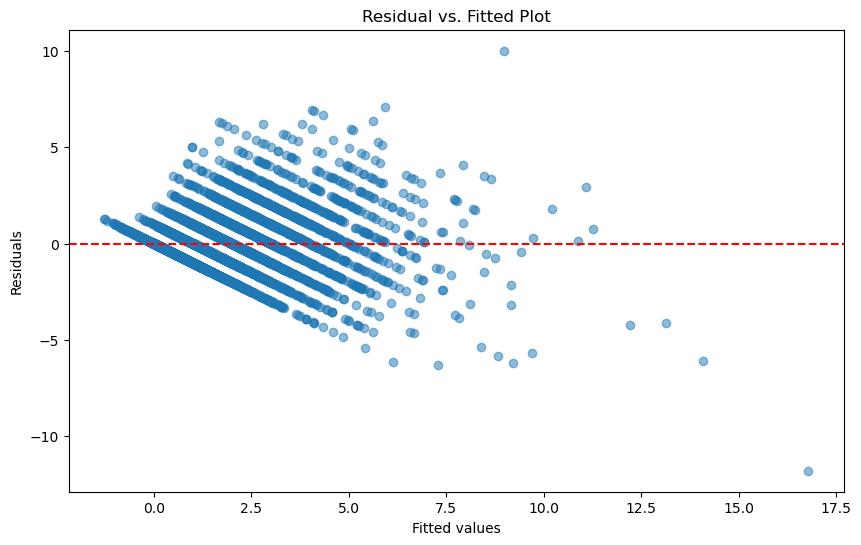

In [8]:
predictions = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.title('Residual vs. Fitted Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()


## 同方差性 检测

In [82]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, sm.add_constant(X_train))
print(f'Breusch-Pagan test: p-value = {bp_test[1]}')
# 低value，拒绝原假设，原假设：存在异方差性， 所以认为有同方差性质，有理由相信模型残差存在异方差性质，及方差随着拟合值的变化而变化
# White test
# white_test = het_white(residuals, X_train_const)
# print(f'White test: p-value = {white_test[1]}')


Breusch-Pagan test: p-value = 7.435544206890544e-55


## 正态性检验

<Figure size 600x400 with 0 Axes>

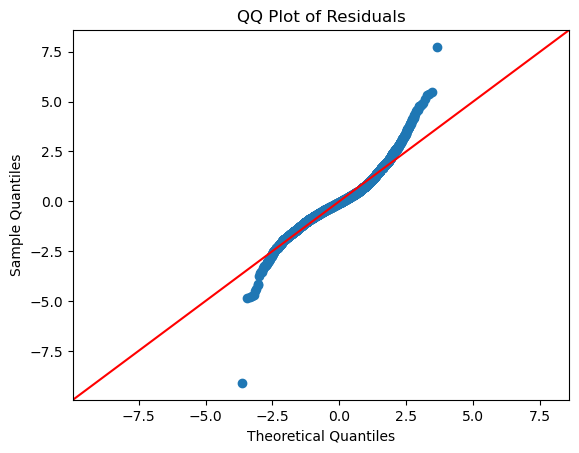

Shapiro-Wilk test: p-value = 2.6064151436441598e-43


/root/miniconda3/envs/envPytorch/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [9]:
# QQ plot
plt.figure(figsize=(6, 4))
fig = sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk test: p-value = {shapiro_test[1]}')


## 独立性检验

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residuals)
print(f'Durbin-Watson test statistic = {dw_test}')
# 在2 左右，没有自相关，残差是独立的

In [ ]:
model.summary()

---

## VIF 共线性处理

In [37]:
#X_train = add_constant(X_train)
# 计算VIF

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# print("VIF values for each feature:")
# print(vif_data)

# 根据VIF值判断是否删除变量
# 通常VIF值大于5或10时，表明存在较强的多重共线性
high_vif_features = vif_data[vif_data["VIF"] > 5]["feature"].tolist()

# 推荐移除具有高VIF值的变量，但也可以根据具体情况选择保留重要的变量
print("Variables to consider removing due to high VIF:", high_vif_features)


Variables to consider removing due to high VIF: ['const', 'host_listings_count', 'accommodates', 'bedrooms', 'minimum_maximum_nights', 'maximum_maximum_nights', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'review_scores_rating', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'room_type_Hotel room']


In [38]:
# 移除高VIF的变量
X_train= X_train.drop(columns=high_vif_features)

In [39]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.792
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              477.0
Date:                Thu, 30 May 2024   Prob (F-statistic):                        0.00
Time:                        00:25:10   Log-Likelihood:                         -3388.6
No. Observations:                7179   AIC:                                      6891.
Df Residuals:                    7122   BIC:                                      7283.
Df Model:                          57                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
host_response_time                              0.0425      0.010      4.174      0.000       0.023       0.062
host_response_rate                             -0.0002      0.001     -0.479      0.632      -0.001       0.001
host_acceptance_rate                            0.0016      0.000      4.839      0.000       0.001       0.002
host_total_listings_count                      -0.0003   6.52e-05     -4.520      0.000      -0.000      -0.000
latitude                                       -0.1106      0.048     -2.310      0.021      -0.204      -0.017
longitude                                      -0.0235      0.011     -2.183      0.029      -0.045      -0.002
bathrooms                                      -0.0333      0.008     -4.032      0.000      -0.050      -0.017
beds                                           -0.0141      0.004     -3.762      0.000      -0.022      -0.007
price                                       -1.272e-06   2.36e-06     -0.540      0.589   -5.89e-06    3.35e-06
minimum_nights                                 -0.0015      0.000     -3.563      0.000      -0.002      -0.001
maximum_nights                               -1.32e-05   1.19e-05     -1.111      0.267   -3.65e-05    1.01e-05
minimum_minimum_nights                         -0.0006      0.001     -1.178      0.239      -0.002       0.000
maximum_minimum_nights                       4.477e-05      0.000      0.301      0.763      -0.000       0.000
minimum_nights_avg_ntm                         -0.0004      0.000     -1.387      0.166      -0.001       0.000
availability_365                              2.92e-05   4.29e-05      0.680      0.496    -5.5e-05       0.000
number_of_reviews                              -0.0015      0.000    -12.707      0.000      -0.002      -0.001
number_of_reviews_ltm                           0.0079      0.001     15.717      0.000       0.007       0.009
review_scores_accuracy                          0.0328      0.024      1.371      0.171      -0.014       0.080
review_scores_cleanliness                       0.0109      0.018      0.616      0.538      -0.024       0.046
review_scores_checkin                          -0.0349      0.021     -1.650      0.099      -0.076       0.007
review_scores_communication                     0.0300      0.024      1.231      0.218      -0.018       0.078
review_scores_location                         -0.0310      0.022     -1.432      0.152      -0.073       0.011
review_scores_value                             0.0175      0.021      0.842      0.400      -0.023       0.058
calculated_host_listings_count_shared_rooms     0.0161      0.035      0

In [40]:
model = sm.OLS(y_train, X_train).fit()
# model.summary()
cols = X_train.columns
X_test1 = X_test[cols]
test_pred = model.predict(X_test1)
train_pred = model.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred) 
evaluate(y_test,test_pred)

Test set evaluation:
_____________________________________
MAE: 0.324629778323382
MSE: 0.15394117251357348
RMSE: 0.39235337708954854
R2 Square 0.4760411510360646
Train set evaluation:
_____________________________________
MAE: 0.3231956636745261
MSE: 0.15049330747243245
RMSE: 0.3879346690777101
R2 Square 0.4962676380258231


(0.324629778323382,
 0.15394117251357348,
 0.39235337708954854,
 0.4760411510360646)

In [41]:
X_train1 = X_train.copy()
y_train1 = y_train.copy()

In [ ]:
X_train = X_train1.copy()
y_train = y_train1.copy()

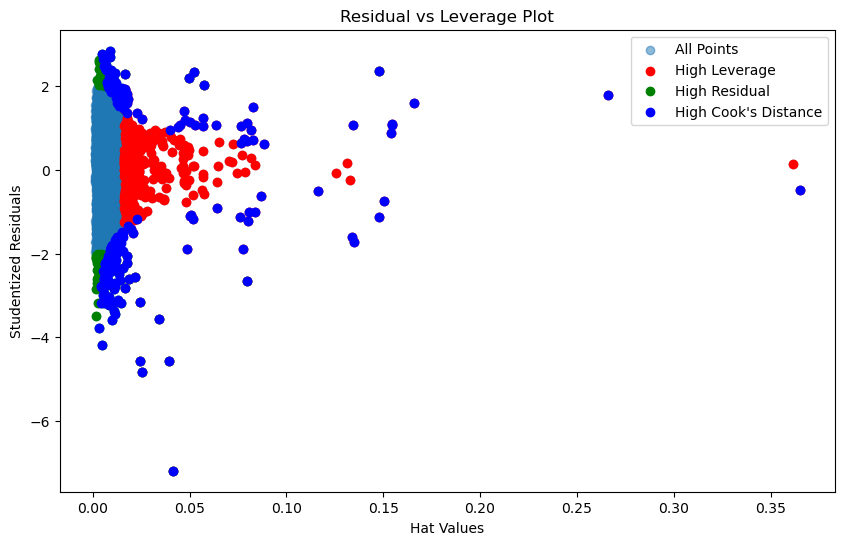

In [42]:
# 拟合模型
model = sm.OLS(y_train, X_train).fit()

# 杠杆值 (hat values)
influence = model.get_influence()
hat_values = influence.hat_matrix_diag

# 学生化残差
studentized_residuals = influence.resid_studentized_external

# Cook's Distance
cooks_d = influence.cooks_distance[0]

# 设置阈值以识别异常值
high_leverage = hat_values > 2 * (X_train.shape[1] + 1) / X_train.shape[0]
high_residual = np.abs(studentized_residuals) > 2
high_cook = cooks_d > 4 / X_train.shape[0]
# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(hat_values, studentized_residuals, alpha=0.5, label='All Points')
plt.scatter(hat_values[high_leverage], studentized_residuals[high_leverage], color='r', label='High Leverage')
plt.scatter(hat_values[high_residual], studentized_residuals[high_residual], color='g', label='High Residual')
plt.scatter(hat_values[high_cook], studentized_residuals[high_cook], color='b', label='High Cook\'s Distance')
plt.xlabel('Hat Values')
plt.ylabel('Studentized Residuals')
plt.title('Residual vs Leverage Plot')
plt.legend()
plt.show()

In [44]:
print(len(hat_values[high_leverage]))
print(len(hat_values[high_residual]))
print(len(hat_values[high_cook]))

403
225
231


In [45]:
X_train1 = X_train.copy()
y_train1 = y_train.copy()

In [56]:
X_train = X_train1.copy()
y_train = y_train1.copy()

In [57]:
to_remove = high_cook
X_filtered = X_train[~to_remove]
y_filtered = y_train[~to_remove]

In [58]:
X_train = X_filtered.copy()
y_train = y_filtered.copy()

In [93]:
model = sm.OLS(y_train, X_train).fit()
# model.summary()
cols = X_train.columns
X_test1 = X_test[cols]
test_pred = model.predict(X_test1)
train_pred = model.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred) 
evaluate(y_test,test_pred)

Test set evaluation:
_____________________________________
MAE: 0.325642994483484
MSE: 0.15939185884359836
RMSE: 0.3992390998431872
R2 Square 0.4574890295411379
Train set evaluation:
_____________________________________
MAE: 0.30442741993900957
MSE: 0.1309909266664892
RMSE: 0.3619266868669527
R2 Square 0.5536480221631916


(0.325642994483484,
 0.15939185884359836,
 0.3992390998431872,
 0.4574890295411379)

In [77]:
pvalues = model.pvalues
zero_coef_features = pvalues[pvalues > 0.05].index
zero_coef_features

Index([], dtype='object')

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              1640.
Date:                Thu, 30 May 2024   Prob (F-statistic):                        0.00
Time:                        00:40:00   Log-Likelihood:                         -2797.4
No. Observations:                6948   AIC:                                      5633.
Df Residuals:                    6929   BIC:                                      5763.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
host_response_time              0.0373      0.009      4.365      0.000       0.021       0.054
host_acceptance_rate            0.0014      0.000      4.703      0.000       0.001       0.002
host_total_listings_count      -0.0004   5.86e-05     -6.102      0.000      -0.000      -0.000
bathrooms                      -0.0345      0.008     -4.467      0.000      -0.050      -0.019
beds                           -0.0170      0.003     -4.997      0.000      -0.024      -0.010
minimum_nights                 -0.0026      0.000    -10.554      0.000      -0.003      -0.002
number_of_reviews              -0.0014      0.000    -12.062      0.000      -0.002      -0.001
number_of_reviews_ltm           0.0089      0.000     18.264      0.000       0.008       0.010
review_scores_accuracy          0.0498      0.017      2.849      0.004       0.016       0.084
review_scores_checkin          -0.0485      0.020     -2.467      0.014      -0.087      -0.010
review_scores_communication     0.0504      0.022      2.263      0.024       0.007       0.094
reviews_per_month               0.2025      0.005     41.750      0.000       0.193       0.212
phone                          -0.2265      0.061     -3.735      0.000      -0.345      -0.108
airbnb_age                   8.072e-05   7.06e-06     11.439      0.000    6.69e-05    9.46e-05
Kitchen                         0.0369      0.019      1.996      0.046       0.001       0.073
Essentials                     -0.0485      0.018     -2.722      0.007      -0.083      -0.014
Hot water                       0.0706      0.018      3.966      0.000       0.036       0.105
Washer                          0.0240      0.009      2.613      0.009       0.006       0.042
instant_bookable_t             -0.0531      0.010     -5.182      0.000      -0.073      -0.033
==============================================================================
Omnibus:                      214.437   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.340
Skew:                          -0.225   Prob(JB):                     3.35e-31
Kurtosis:                       2.468   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# 存档点
X_train1 = X_train.copy()
y_train1 = y_train.copy()

In [75]:
X_train = X_train.drop(columns=zero_coef_features)


In [92]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              1640.
Date:                Thu, 30 May 2024   Prob (F-statistic):                        0.00
Time:                        01:10:13   Log-Likelihood:                         -2797.4
No. Observations:                6948   AIC:                                      5633.
Df Residuals:                    6929   BIC:                                      5763.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
host_response_time              0.0373      0.009      4.365      0.000       0.021       0.054
host_acceptance_rate            0.0014      0.000      4.703      0.000       0.001       0.002
host_total_listings_count      -0.0004   5.86e-05     -6.102      0.000      -0.000      -0.000
bathrooms                      -0.0345      0.008     -4.467      0.000      -0.050      -0.019
beds                           -0.0170      0.003     -4.997      0.000      -0.024      -0.010
minimum_nights                 -0.0026      0.000    -10.554      0.000      -0.003      -0.002
number_of_reviews              -0.0014      0.000    -12.062      0.000      -0.002      -0.001
number_of_reviews_ltm           0.0089      0.000     18.264      0.000       0.008       0.010
review_scores_accuracy          0.0498      0.017      2.849      0.004       0.016       0.084
review_scores_checkin          -0.0485      0.020     -2.467      0.014      -0.087      -0.010
review_scores_communication     0.0504      0.022      2.263      0.024       0.007       0.094
reviews_per_month               0.2025      0.005     41.750      0.000       0.193       0.212
phone                          -0.2265      0.061     -3.735      0.000      -0.345      -0.108
airbnb_age                   8.072e-05   7.06e-06     11.439      0.000    6.69e-05    9.46e-05
Kitchen                         0.0369      0.019      1.996      0.046       0.001       0.073
Essentials                     -0.0485      0.018     -2.722      0.007      -0.083      -0.014
Hot water                       0.0706      0.018      3.966      0.000       0.036       0.105
Washer                          0.0240      0.009      2.613      0.009       0.006       0.042
instant_bookable_t             -0.0531      0.010     -5.182      0.000      -0.073      -0.033
==============================================================================
Omnibus:                      214.437   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.340
Skew:                          -0.225   Prob(JB):                     3.35e-31
Kurtosis:                       2.468   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 进行WSL

In [90]:
# 首先用OLS估计初步残差
ols_model = sm.OLS(y_train, X_train).fit()
preliminary_resid = ols_model.resid

# 使用残差的平方的倒数作为权重
# 防止除以零，可以给分母加一个小的正数
weights = 1.0 / (preliminary_resid**2 + 0.01)

# 然后用这些权重进行WLS
model = sm.WLS(y_train, X_train, weights=weights)
model = model.fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.954
Model:                            WLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              7624.
Date:                Thu, 30 May 2024   Prob (F-statistic):                        0.00
Time:                        01:09:50   Log-Likelihood:                         -105.41
No. Observations:                6948   AIC:                                      248.8
Df Residuals:                    6929   BIC:                                      378.9
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
host_response_time              0.0394      0.004      9.780      0.000       0.032       0.047
host_acceptance_rate            0.0016      0.000     11.500      0.000       0.001       0.002
host_total_listings_count      -0.0004   2.88e-05    -14.503      0.000      -0.000      -0.000
bathrooms                      -0.0432      0.004    -12.049      0.000      -0.050      -0.036
beds                           -0.0188      0.002    -11.420      0.000      -0.022      -0.016
minimum_nights                 -0.0025   9.62e-05    -26.152      0.000      -0.003      -0.002
number_of_reviews              -0.0015   5.45e-05    -26.986      0.000      -0.002      -0.001
number_of_reviews_ltm           0.0087      0.000     37.189      0.000       0.008       0.009
review_scores_accuracy          0.0560      0.008      6.850      0.000       0.040       0.072
review_scores_checkin          -0.0626      0.009     -7.138      0.000      -0.080      -0.045
review_scores_communication     0.0566      0.010      5.654      0.000       0.037       0.076
reviews_per_month               0.2101      0.002     90.806      0.000       0.206       0.215
phone                          -0.2324      0.023    -10.055      0.000      -0.278      -0.187
airbnb_age                    8.68e-05   3.66e-06     23.742      0.000    7.96e-05     9.4e-05
Kitchen                         0.0434      0.009      4.573      0.000       0.025       0.062
Essentials                     -0.0567      0.008     -6.802      0.000      -0.073      -0.040
Hot water                       0.0848      0.008      9.995      0.000       0.068       0.101
Washer                          0.0281      0.005      6.150      0.000       0.019       0.037
instant_bookable_t             -0.0577      0.005    -11.163      0.000      -0.068      -0.048
==============================================================================
Omnibus:                    26478.515   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              997.762
Skew:                          -0.079   Prob(JB):                    2.18e-217
Kurtosis:                       1.150   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
cols = X_train.columns
X_test1 = X_test[cols]
test_pred = model.predict(X_test1)
train_pred = model.predict(X_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred) 
evaluate(y_test,test_pred)

Test set evaluation:
_____________________________________
MAE: 0.32458433296195927
MSE: 0.1611553458515206
RMSE: 0.401441584606678
R2 Square 0.4514867716152907
Train set evaluation:
_____________________________________
MAE: 0.30241223833464614
MSE: 0.13141100397575295
RMSE: 0.36250655714863
R2 Square 0.5522166074644346


(0.32458433296195927,
 0.1611553458515206,
 0.401441584606678,
 0.4514867716152907)

In [87]:
cols = X_train.columns
X_test = X_test[cols]


In [88]:
pd.DataFrame(X_train).to_csv('X_train_boxcox_vif_filter.csv',index=False)
pd.DataFrame(y_train).to_csv('y_train_boxcox_vif_filter.csv',index=False)
pd.DataFrame(y_test).to_csv('y_test_boxcox_vif_filter.csv', index=False)
pd.DataFrame(X_test).to_csv('X_test_boxcox_vif_filter.csv', index=False)

In [89]:
cols

Index(['host_response_time', 'host_acceptance_rate',
       'host_total_listings_count', 'bathrooms', 'beds', 'minimum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_communication',
       'reviews_per_month', 'phone', 'airbnb_age', 'Kitchen', 'Essentials',
       'Hot water', 'Washer', 'instant_bookable_t'],
      dtype='object')

In [10]:
c = ['host_response_time', 'host_acceptance_rate',
       'host_total_listings_count', 'bathrooms', 'beds', 'minimum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_communication',
       'reviews_per_month', 'phone', 'airbnb_age', 'Kitchen', 'Essentials',
       'Hot water', 'Washer', 'instant_bookable_t']

In [11]:
len(c)

19